In [3]:
using Distributed
using Plots
using StatsBase
import QuantumStates
procs_to_use = 15
if nprocs() <= procs_to_use
    addprocs(procs_to_use-nprocs())
end

[ Info: Precompiling QuantumStates [17f0441f-15e0-42ae-a101-302633ff8f0f] 
┌ Info: Skipping precompilation due to precompilable error. Importing QuantumStates [17f0441f-15e0-42ae-a101-302633ff8f0f].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.


14-element Vector{Int64}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15

In [4]:
@everywhere include("helper_functions.jl")
@everywhere include("define_CaF_SF_cooling.jl")

      From worker 15:	WARNING: redefinition of constant QuantumStates.T_kq. This may fail, cause incorrect answers, or produce other errors.
      From worker 2:	WARNING: redefinition of constant QuantumStates.T_kq. This may fail, cause incorrect answers, or produce other errors.
      From worker 11:	WARNING: redefinition of constant QuantumStates.T_kq. This may fail, cause incorrect answers, or produce other errors.
      From worker 3:	WARNING: redefinition of constant QuantumStates.T_kq. This may fail, cause incorrect answers, or produce other errors.
      From worker 9:	WARNING: redefinition of constant QuantumStates.T_kq. This may fail, cause incorrect answers, or produce other errors.
      From worker 14:	WARNING: redefinition of constant QuantumStates.T_kq. This may fail, cause incorrect answers, or produce other errors.
      From worker 6:	WARNING: redefinition of constant QuantumStates.T_kq. This may fail, cause incorrect answers, or produce other errors.
      From worker

In [3]:
prob_SFcooling.p.add_spontaneous_decay_kick = true
n_trajectories = 100
δs = -0.6:0.1:0.8
P_fractions = 0.2:0.2:1.0
Δ = 25
all_sols = []
for P_fraction ∈ P_fractions
    _sols = []
    for δ ∈ δs
        update_params!(prob_SFcooling, Δ, δ, P_fraction)
        sols = distributed_solve(n_trajectories, prob_SFcooling, prob_func!, scan_nothing, [0])
        push!(_sols, sols)
    end
    push!(all_sols, _sols)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:09:07K
Progress: 100%|█████████████████████████████████████████| Time: 0:04:13
Progress: 100%|█████████████████████████████████████████| Time: 0:04:11
Progress: 100%|█████████████████████████████████████████| Time: 0:04:04
Progress: 100%|█████████████████████████████████████████| Time: 0:04:07
Progress: 100%|█████████████████████████████████████████| Time: 0:04:05
Progress:  19%|████████                                 |  ETA: 0:03:21Excessive output truncated after 524309 bytes.

In [13]:
include("helper_functions.jl")

update_params! (generic function with 1 method)

In [5]:
using NPZ
using JLD2

In [6]:
prob_SFcooling.p.add_spontaneous_decay_kick = true
n_trajectories = 90
δs = -0.6:0.05:0.8
P_fractions = 0.2:0.2:1.0
Δ = 25
all_sols = []
temps = zeros(5, 29)
i = 1
for P_fraction ∈ P_fractions
    _sols = []
    j = 1
    for δ ∈ δs
        update_params!(prob_SFcooling, Δ, δ, P_fraction)
        sols = distributed_solve(n_trajectories, prob_SFcooling, prob_func!, scan_nothing, [0])
        push!(_sols, sols)
        temps[i, j] = T_ensemble_sol(sols[1])
        save_object("temps.jld2", temps)
        j = j+1
    end
    push!(all_sols, _sols)
    i = i+1
end

Progress: 100%|█████████████████████████████████████████| Time: 0:04:56
Progress: 100%|█████████████████████████████████████████| Time: 0:03:36
Progress: 100%|█████████████████████████████████████████| Time: 0:03:27
Progress: 100%|█████████████████████████████████████████| Time: 0:03:25
Progress: 100%|█████████████████████████████████████████| Time: 0:03:27
Progress: 100%|█████████████████████████████████████████| Time: 0:03:25
Progress: 100%|█████████████████████████████████████████| Time: 0:03:28
Progress: 100%|█████████████████████████████████████████| Time: 0:03:25
Progress: 100%|█████████████████████████████████████████| Time: 0:03:25
Progress: 100%|█████████████████████████████████████████| Time: 0:03:28
Progress: 100%|█████████████████████████████████████████| Time: 0:03:27
Progress: 100%|█████████████████████████████████████████| Time: 0:03:28
Progress: 100%|█████████████████████████████████████████| Time: 0:03:38
Progress: 100%|█████████████████████████████████████████| Time: 

In [7]:
save_object("all_sols.jld2", all_sols)

In [ ]:
using ColorSchemes
temps = zeros(5, 29)
for i ∈ 1:5
    for (j, sols) ∈ enumerate(all_sols[i])
        temp = T_ensemble_sol(sols[1])
        temps[i, j] = temp
    end
end
npzwrite("temps.npz",temps)
save("temps.jld", "temps", temps)

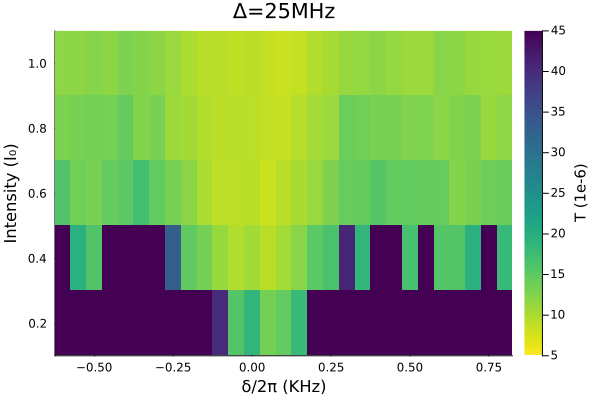

In [14]:
Plots.heatmap(δs,P_fractions, (temps)*1e6, c=cgrad(:viridis, rev=true), colorbar_title="T (1e-6)", xlabel ="δ/2π (KHz)", ylabel = "Intensity (I₀)", title="Δ=25MHz")

In [19]:
temps

5×29 Matrix{Float64}:
 8.86217e-5  8.52108e-5  8.5144e-5   …  6.43025e-5  7.21836e-5  7.47837e-5
 7.4002e-5   1.9573e-5   1.58489e-5     1.94644e-5  5.4177e-5   1.80435e-5
 1.58761e-5  1.36279e-5  1.31858e-5     1.30104e-5  1.38758e-5  1.40762e-5
 1.27695e-5  1.31278e-5  1.33814e-5     1.28813e-5  1.1196e-5   1.17517e-5
 1.17699e-5  1.1821e-5   1.22508e-5     1.11485e-5  1.10788e-5  1.08631e-5

In [17]:
npzwrite("temps.npz",temps)

In [16]:
load_object("temps.jld2")

5×29 Matrix{Float64}:
 8.86217e-5  8.52108e-5  8.5144e-5   …  6.43025e-5  7.21836e-5  7.47837e-5
 7.4002e-5   1.9573e-5   1.58489e-5     1.94644e-5  5.4177e-5   1.80435e-5
 1.58761e-5  1.36279e-5  1.31858e-5     1.30104e-5  1.38758e-5  1.40762e-5
 1.27695e-5  1.31278e-5  1.33814e-5     1.28813e-5  1.1196e-5   1.17517e-5
 1.17699e-5  1.1821e-5   1.22508e-5     1.11485e-5  1.10788e-5  1.08631e-5

In [9]:
Plots.savefig("scan.png")

"C:\\Github\\CaF-cooling-simulations\\scan.png"

In [14]:
using ColorSchemes
temps = zeros(5, 15)
for i ∈ 1:5
    for (j, sols) ∈ enumerate(all_sols[i])
        temp = T_ensemble_sol(sols[1])
        temps[i, j] = temp
    end
end
transpose(temps)

15×5 transpose(::Matrix{Float64}) with eltype Float64:
 6.45705e-5  9.46177e-5   1.58509e-5  1.46314e-5  1.3159e-5
 7.40017e-5  0.000103018  8.92209e-5  1.38907e-5  1.2973e-5
 7.77314e-5  0.000101881  9.41006e-5  1.7293e-5   1.45089e-5
 6.95587e-5  7.48085e-5   5.30461e-5  1.63572e-5  1.32604e-5
 5.76605e-5  5.12123e-5   1.70761e-5  1.27343e-5  1.08115e-5
 5.45714e-5  1.39594e-5   1.14084e-5  1.02716e-5  9.5037e-6
 3.95851e-5  1.34185e-5   1.03182e-5  8.9511e-6   9.4109e-6
 4.35958e-5  1.29285e-5   1.03752e-5  8.78376e-6  8.17809e-6
 4.9959e-5   2.03532e-5   1.62605e-5  1.15331e-5  1.09631e-5
 6.70095e-5  5.62329e-5   3.79989e-5  1.511e-5    1.42978e-5
 6.09926e-5  6.53257e-5   5.4332e-5   1.5922e-5   1.31484e-5
 6.14877e-5  7.26825e-5   5.46355e-5  1.66267e-5  1.43638e-5
 6.42067e-5  7.29496e-5   1.71562e-5  1.45606e-5  1.3206e-5
 6.80558e-5  6.56769e-5   1.64043e-5  1.54674e-5  1.32291e-5
 6.23592e-5  7.16577e-5   1.70179e-5  1.506e-5    1.31739e-5

In [24]:
temps = [[6.45705e-5  9.46177e-5   1.58509e-5  1.46314e-5  1.3159e-5];[7.40017e-5  0.000103018  8.92209e-5  1.38907e-5  1.2973e-5];[7.77314e-5  0.000101881  9.41006e-5  1.7293e-5   1.45089e-5];[6.95587e-5  7.48085e-5   5.30461e-5  1.63572e-5  1.32604e-5];[ 5.76605e-5  5.12123e-5   1.70761e-5  1.27343e-5  1.08115e-5];[5.45714e-5  1.39594e-5   1.14084e-5  1.02716e-5  9.5037e-6];[3.95851e-5  1.34185e-5   1.03182e-5  8.9511e-6   9.4109e-6];[4.35958e-5  1.29285e-5   1.03752e-5  8.78376e-6  8.17809e-6];[4.9959e-5   2.03532e-5   1.62605e-5  1.15331e-5  1.09631e-5];[6.70095e-5  5.62329e-5   3.79989e-5  1.511e-5    1.42978e-5];[6.09926e-5  6.53257e-5   5.4332e-5   1.5922e-5   1.31484e-5];[6.14877e-5  7.26825e-5   5.46355e-5  1.66267e-5  1.43638e-5];[6.42067e-5  7.29496e-5   1.71562e-5  1.45606e-5  1.3206e-5];[6.80558e-5  6.56769e-5   1.64043e-5  1.54674e-5  1.32291e-5];[6.23592e-5  7.16577e-5   1.70179e-5  1.506e-5    1.31739e-5]]

15×5 Matrix{Float64}:
 6.45705e-5  9.46177e-5   1.58509e-5  1.46314e-5  1.3159e-5
 7.40017e-5  0.000103018  8.92209e-5  1.38907e-5  1.2973e-5
 7.77314e-5  0.000101881  9.41006e-5  1.7293e-5   1.45089e-5
 6.95587e-5  7.48085e-5   5.30461e-5  1.63572e-5  1.32604e-5
 5.76605e-5  5.12123e-5   1.70761e-5  1.27343e-5  1.08115e-5
 5.45714e-5  1.39594e-5   1.14084e-5  1.02716e-5  9.5037e-6
 3.95851e-5  1.34185e-5   1.03182e-5  8.9511e-6   9.4109e-6
 4.35958e-5  1.29285e-5   1.03752e-5  8.78376e-6  8.17809e-6
 4.9959e-5   2.03532e-5   1.62605e-5  1.15331e-5  1.09631e-5
 6.70095e-5  5.62329e-5   3.79989e-5  1.511e-5    1.42978e-5
 6.09926e-5  6.53257e-5   5.4332e-5   1.5922e-5   1.31484e-5
 6.14877e-5  7.26825e-5   5.46355e-5  1.66267e-5  1.43638e-5
 6.42067e-5  7.29496e-5   1.71562e-5  1.45606e-5  1.3206e-5
 6.80558e-5  6.56769e-5   1.64043e-5  1.54674e-5  1.32291e-5
 6.23592e-5  7.16577e-5   1.70179e-5  1.506e-5    1.31739e-5

In [12]:
transpose(temps);

In [17]:
δs = -600:100:800
P_fractions = 1:1:5

1:1:5

In [33]:
using ColorSchemes

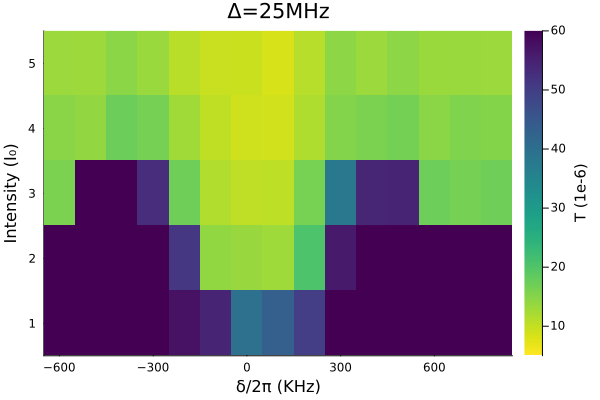

In [40]:
Plots.heatmap(δs,P_fractions, clim=(5,60), transpose(temps)*1e6, c=cgrad(:viridis, rev=true), colorbar_title="T (1e-6)", xlabel ="δ/2π (KHz)", ylabel = "Intensity (I₀)", title="Δ=25MHz")

In [41]:
savefig("lambda_cooling_scan.png")  

"c:\\Github\\CaF-cooling-simulations\\lambda_cooling_scan.png"

In [3]:
Plots.heatmap(δs,P_fractions, temps*1e6, c = :viridis, colorbar_title="T (1e-6)", xlabel ="δ (MHz)", ylabel = "Max power fraction (arb. u.)", title="Δ=25MHz")

UndefVarError: UndefVarError: `δs` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [9]:
(minimum(temps), maximum(temps))

(1.0034310387061547e-5, 0.00010863095634880814)

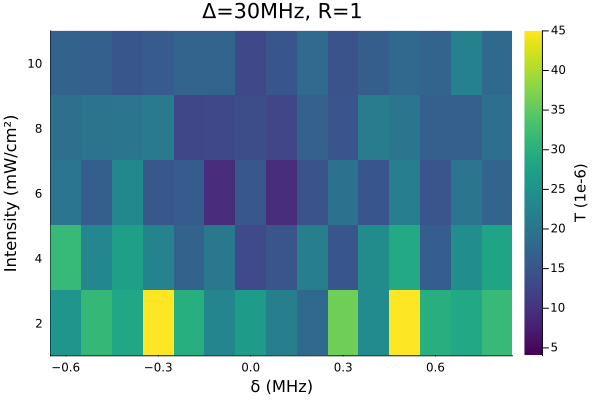

In [102]:
using ColorSchemes
temps = zeros(5, 15)
for i ∈ 1:5
    for (j, sols) ∈ enumerate(all_sols[i])
        temp = T_ensemble_sol(sols[1])
        temps[i, j] = temp
    end
end
transpose(temps)
Plots.heatmap(δs,P_fractions, temps*1e6, c = :viridis, colorbar_title="T (1e-6)", xlabel ="δ (MHz)", ylabel = "Max power fraction (arb. u.)", title="Δ=25MHz")

In [62]:
(minimum(temps), maximum(temps))

(9.180611849690034e-6, 5.803034163090363e-5)

In [114]:
prob_SFcooling.p.add_spontaneous_decay_kick = true
n_trajectories = 5
Δs = 24:1:31
Is = 2:2:10
δ = 0
R = 1
all_sols = []
for I ∈ Is
    _sols = []
    for Δ ∈ Δs
        update_params!(prob_SFcooling, Δ, δ, I*10, R)
        sols = distributed_solve(n_trajectories, prob_SFcooling, prob_func!, scan_nothing, [0])
        push!(_sols, sols)
    end
    push!(all_sols, _sols)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
Progress: 100%|█████████████████████████████████████████| Time: 0:00:13
Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
Progress: 100%|█████████████████████████████████████████| Time: 

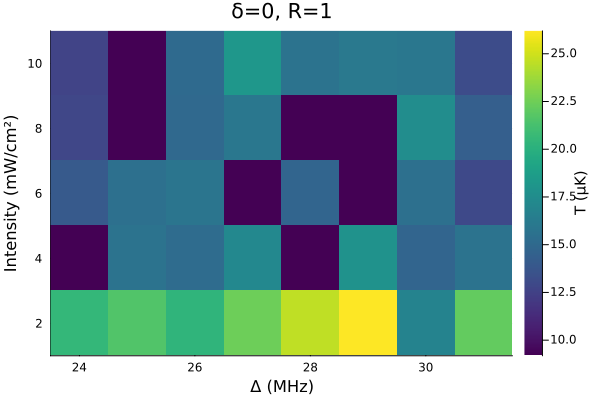

In [116]:
using ColorSchemes
temps = zeros(length(Is),length(Δs))
for i ∈ 1:length(Is)
    for (j, sols) ∈ enumerate(all_sols[i])
        temp = T_ensemble_sol(sols[1])
        temps[i, j] = temp
    end
end
transpose(temps)
Plots.heatmap(Δs, Is, (temps*1e6), c= :viridis, colorbar_title="T (μK)", xlabel ="Δ (MHz)", ylabel = "Intensity (mW/cm²)", title="δ=0, R=1")

In [118]:
(minimum(temps), maximum(temps))

(9.180307559348422e-6, 2.6197760177122174e-5)

In [31]:
maximum(temps)

3.126137797238105e-5

In [16]:
prob_SFcooling.p.add_spontaneous_decay_kick = true
n_trajectories = 50
sols = distributed_solve(n_trajectories, prob_SFcooling, prob_func!, scan_nothing, [0]);

Progress: 100%|█████████████████████████████████████████| Time: 0:10:48


In [23]:
include("helper_functions.jl")

update_params! (generic function with 1 method)

In [54]:
include("helper_functions.jl")

update_params! (generic function with 1 method)

In [20]:
num_tsteps = length(all_sols[3][3][1][1])

temps_evol_all = []
for j ∈ 1:5
    for k ∈ 1:29
        temps_evol = zeros(num_tsteps)
        for i ∈ 1:num_tsteps
            temps_evol[i] = T_ensemble_sol_arb_idx(all_sols[j][k][1], i)
        end
        push!(temps_evol_all, temps_evol)
    end
end


In [74]:
threshold = 1e-5
jumps_counts = []
for temps_evol ∈ temps_evol_all
    temps_differences = []
    jumps = 0
    for i ∈ 2:length(temps_evol)
        push!(temps_differences, abs(temps_evol[i] - temps_evol[i-1]))
    end
    for diff ∈ temps_differences
        if diff >= threshold
            jumps = jumps + 1
        end
    end
    push!(jumps_counts, jumps)
end
most_jumps_indices = sortperm(jumps_counts, rev=true)

75-element Vector{Int64}:
 31
 32
 43
 33
 42
 45
 41
 48
 34
 29
  ⋮
 67
 68
 69
 70
 71
 72
 73
 74
 75

In [112]:
T_ensemble_sol_arb_idx(all_sols[3][1][1], 80)

9.065336951828351e-5

In [93]:
include("helper_functions.jl")

update_params! (generic function with 1 method)

In [113]:
fv1, _ = get_histogram_arb_idx(all_sols[3][1][1], 80, 0.1)
fv2, _ = get_histogram_arb_idx(all_sols[3][1][1], 90, 0.1)

([3.1213872832369938, 2.967244701348747, 2.466281310211946, 1.0404624277456647, 0.30828516377649323, 0.038535645472061654, 0.05780346820809248, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  0.0:0.1:2.0
weights: [162, 154, 128, 54, 16, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
closed: left
isdensity: true)

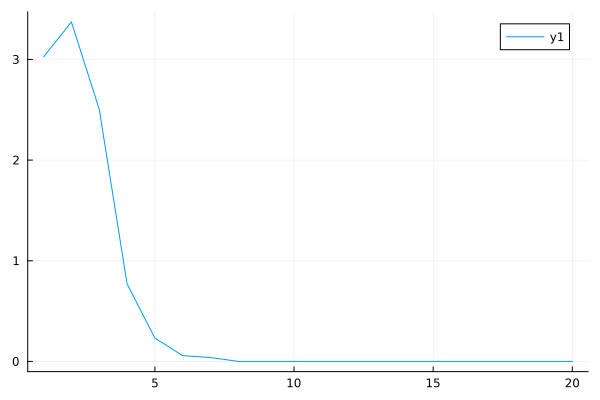

In [114]:
plot(fv1)

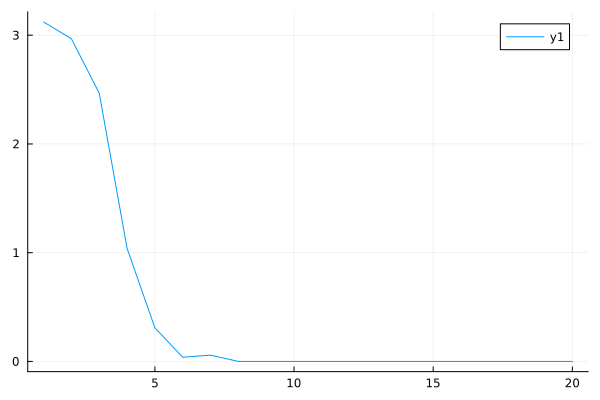

In [115]:
plot(fv2)

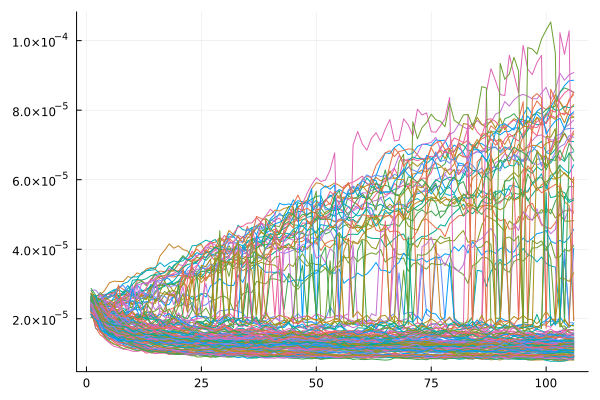

In [21]:
plot()
for i ∈ 1:145
    plot!(temps_evol_all[i])
end
plot!(legend=nothing)

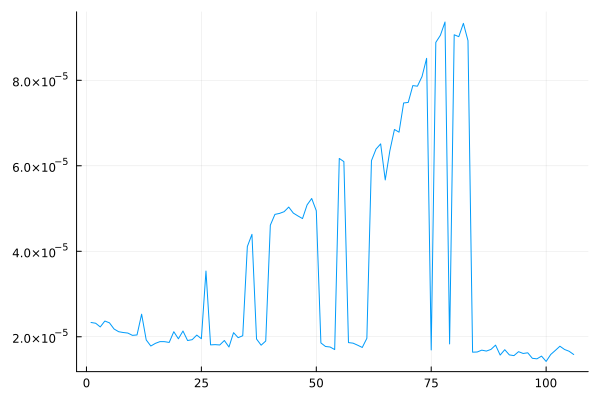

In [88]:
plot()
for i ∈ 1:1
    plot!(temps_evol_all[most_jumps_indices[i]])
end
plot!(legend=nothing)

In [71]:
plot(fmt=:svg)
for i ∈ 1:145
    plot!(temps_evol_all[i])
end
plot!(legend=nothing)
savefig("all_temps_145.png")

"c:\\Github\\CaF-cooling-simulations\\all_temps.png"

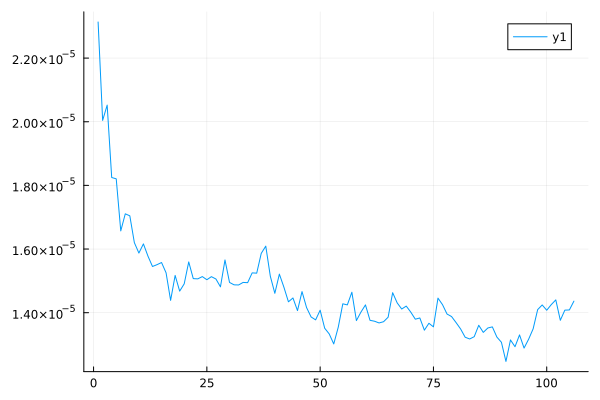

In [59]:
plot(temps_evol)

In [24]:
num_tsteps = length(sols[1][1])
temps_evol = zeros(num_tsteps)
for i ∈ 1:num_tsteps
    temps_evol[i] = T_ensemble_sol_arb_idx(sols[1], i)
end
# @. temps_evol = T_ensemble_sol(sols[1])

In [25]:
temps_evol[end]

1.382161545897981e-5

In [26]:
T_ensemble_sol(sols[1])

1.382161545897981e-5

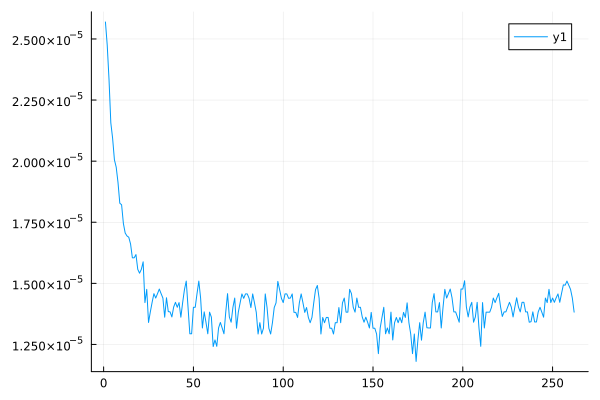

In [27]:
plot(temps_evol)

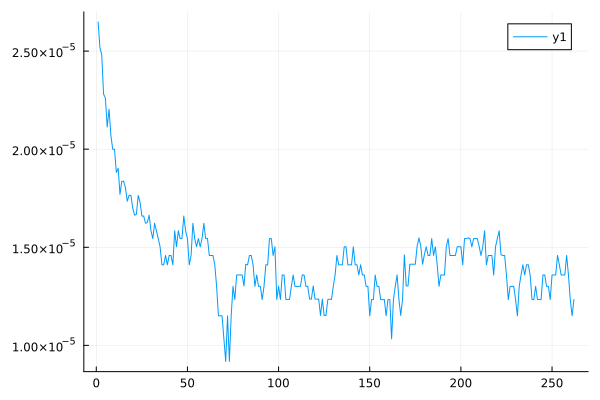

In [14]:
plot(temps_evol)

In [124]:
length(sols[1][1].u)

54

In [29]:
I

45.83662361046586

In [41]:
Isat

48.74672446082103

In [43]:
beam_radius = 5e-3
Isat = π * h * c * Γ / (3 * λ^3)
P = 0.55 * 13.1e-3 # 13.1 mW/1 V at 1.0 V, factor of 0.55 to match scattering rates
I = 2 * P / (π * beam_radius^2)

total_sat = I / Isat
s1 = total_sat/2
s2 = total_sat/2

1.881909199291939

In [42]:
I

183.47381839633695

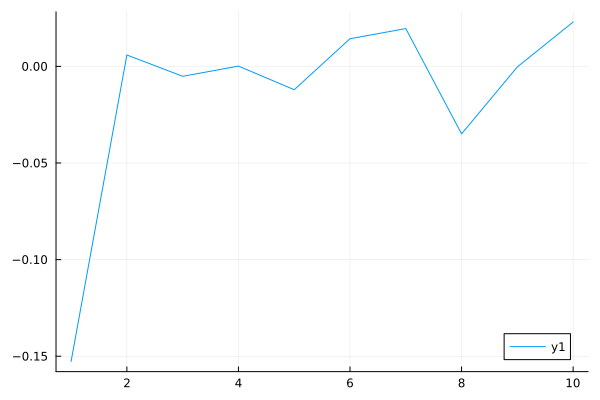

In [68]:
vcoords_end = [vx(sol.u[end]) for sol ∈ sols[1] if survived(sol)]
plot(vcoords_end)

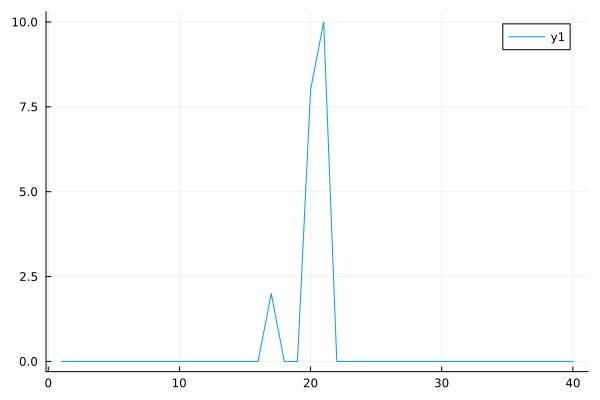

In [69]:
hist_data = StatsBase.fit(Histogram, vcoords_end, -1.0:0.05:1.0)
hist_data.isdensity = true
v = collect(hist_data.edges[1])
dv = v[2] - v[1]
v = v[1:end-1] .+ dv / 2
fv = hist_data.weights ./ (sum(hist_data.weights) * dv)
plot(fv)

In [70]:
v_fit = LsqFit.curve_fit(maxwell_boltzmann_1D, v, fv, [10, 10e-6])

DomainError: DomainError with -4677.33906297881:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

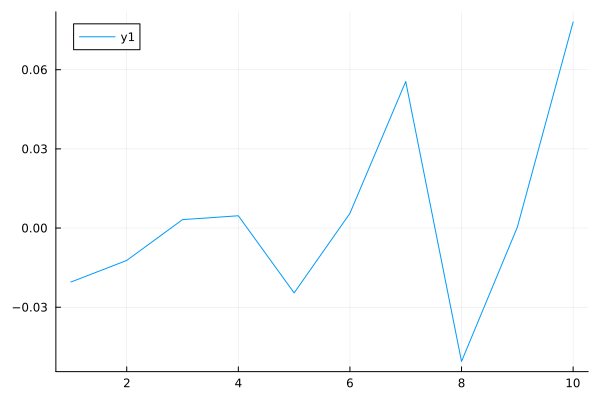

In [71]:
vcoords_end = [vz(sol.u[end]) for sol ∈ sols[1] if survived(sol)]
plot(vcoords_end)

In [38]:
hist_data = StatsBase.fit(Histogram, vcoords_end, -1.0:0.05:1.0)
hist_data.isdensity = true
v = collect(hist_data.edges[1])
dv = v[2] - v[1]
v = v[1:end-1] .+ dv / 2
fv = hist_data.weights ./ (sum(hist_data.weights) * dv)
plot(fv)

UndefVarError: UndefVarError: `vcoords_end` not defined

In [73]:
v_fit = LsqFit.curve_fit(maxwell_boltzmann_1D, v, fv, [10, 10e-6])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([1.033005617915848, 1.9271222644343238e-5], [7.723726745405997e-76, 3.0468672130560604e-68, 4.787284957768115e-61, 2.9959472039727095e-54, 7.467722259805151e-48, 7.4139778410665e-42, 2.9317270559450907e-36, 4.617478811272539e-31, 2.8966459277725854e-26, 7.2376076840701005e-22  …  7.2376076840701005e-22, 2.8966459277725234e-26, 4.617478811272539e-31, 2.931727055945007e-36, 7.4139778410665e-42, 7.467722259805151e-48, 2.995947203972582e-54, 4.787284957768115e-61, 3.0468672130559735e-68, 7.723726745405997e-76], [7.476945537678365e-76 8.296631429058891e-53; 2.9495165952388574e-68 4.997636422752455e-47; … ; 2.9495165952717738e-68 4.997636422752313e-47; 7.476945537678365e-76 8.296631429058891e-53], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

In [9]:
@. (QuantumStates.energy(states)-2.05092333109709e10)*1e-6

16-element Vector{Float64}:
   0.0
   0.0
   0.0
  76.29376402909851
 122.95149305819702
 122.95149305819702
 122.95149305819702
 147.8178290290985
 147.8178290290985
 147.8178290290985
 147.8178290290985
 147.8178290290985
   4.943794294940349e8
   4.943794294940349e8
   4.943794294940349e8
   4.943794304940349e8

In [16]:
states[5]

State{HundsCaseB_LinearMolecule}(2.06321848040291e10, HundsCaseB_LinearMolecule[HundsCaseB_LinearMolecule(0.0, "X", 0, 0, 0, 1/2, 1/2, 0, 0, 0, 1, 3/2, 2, -2, (K = 0, N = 0:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_LinearMolecule(0.0, "X", 0, 0, 0, 1/2, 1/2, 0, 0, 0, 1, 1/2, 1, -1, (K = 0, N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_LinearMolecule(0.0, "X", 0, 0, 0, 1/2, 1/2, 0, 0, 0, 1, 3/2, 1, -1, (K = 0, N = 0:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -1.0:1.0:1.0)), HundsCaseB_LinearMolecule(0.0, "X", 0, 0, 0, 1/2, 1/2, 0, 0, 0, 1, 3/2, 2, -1, (K = 0, N = 0:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_LinearMolecule(0.0, "X", 0, 0, 0, 1/2, 1/2, 0, 0, 0, 1, 1/2, 0, 0, (K = 0, N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_LinearMolecule(0.0, "X", 0, 0, 0, 1/2, 1/2, 0, 0, 0, 1, 1/2, 1, 0, (K = 0, N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_LinearMolecu

In [6]:
length(sols)

1

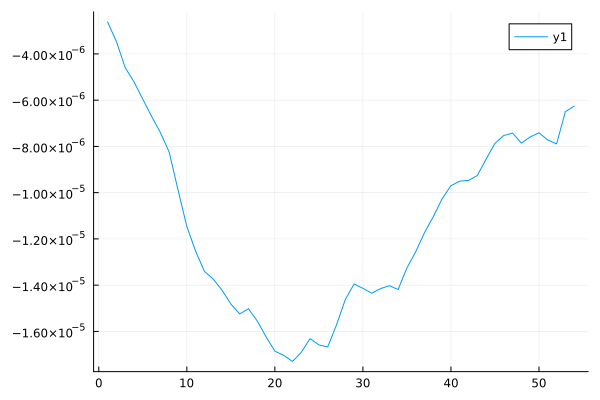

In [29]:
plot(z.(sols[1][1].u))

In [62]:
Tx_fit(sols[1]) |> display
Ty_fit(sols[1]) |> display
Tz_fit(sols[1]) |> display

2.1011016788835044e-5

2.1533718582597124e-5

6.9455348908500695e-6

In [8]:
vxs = [vx(sol.u[end]) for sol ∈ sols[1] if survived(sol)]
vys = [vy(sol.u[end]) for sol ∈ sols[1] if survived(sol)]
vzs = [vz(sol.u[end]) for sol ∈ sols[1] if survived(sol)]

vs = sqrt.(vxs .^ 2 .+ vys .^ 2 .+ vzs .^ 2)
hist_data = fit(Histogram, vs, 0:0.02:2.0)
hist_data.isdensity = true
v = collect(hist_data.edges[1])
dv = v[2] - v[1]
v = v[1:end-1] .+ dv / 2
fv = hist_data.weights ./ (sum(hist_data.weights) * dv)
plot(v, fv)


UndefVarError: UndefVarError: `sols` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [49]:
fv

100-element Vector{Float64}:
  0.0
  1.6129032258064517
  1.6129032258064517
  1.6129032258064517
  3.2258064516129035
  6.451612903225807
 12.903225806451614
  3.2258064516129035
  8.064516129032258
  0.0
  ⋮
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

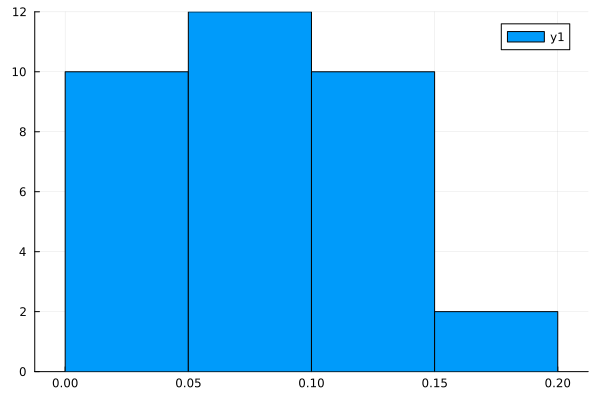

In [64]:
histogram(vs)

In [63]:
T_ensemble_sol(sols[1])

2.18115728208405e-5

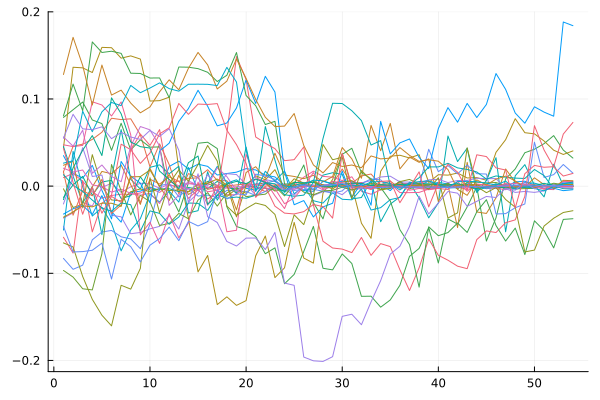

In [14]:
plot()
for i ∈ 1:30
    plot!(vx.(sols[1][i].u))
end
plot!(legend=nothing)

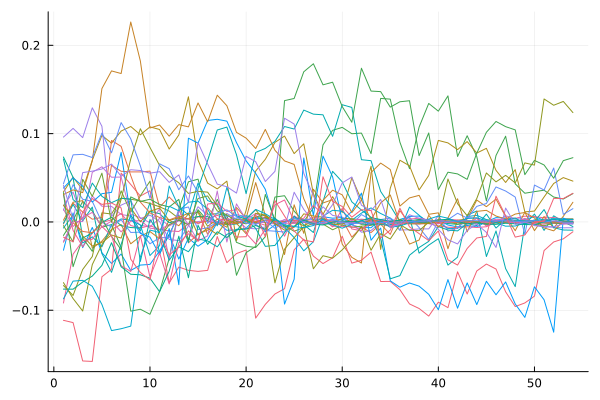

In [11]:
plot()
for i ∈ 1:30
    plot!(vy.(sols[1][i].u))
end
plot!(legend=nothing)

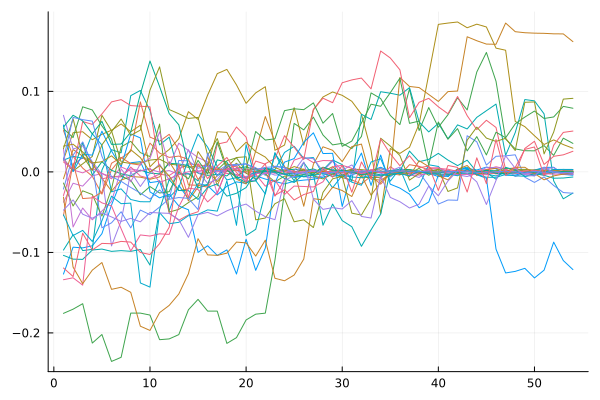

In [12]:
plot()
for i ∈ 1:30
    plot!(vz.(sols[1][i].u))
end
plot!(legend=nothing)